In [15]:
import math
from mdp_environment import *
from mdp_batchRL_agent import *
import numpy as np

from copy import deepcopy

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def simulateEpisodes(environment, agent, num_episodes, test_every=50):
    episode = 0
    Q_val_list = []
    param_list = []
    while (episode < num_episodes):
        environment.resetCurrentState()
        print('Episode %d' % (episode, ))
        while (True):
            state = environment.getCurrentState()
            action = agent.getAction(state, train=True)
            reward, next_state, is_terminal = environment.takeAction(action)
            agent.update((state, action, reward, next_state), is_terminal)
            if (is_terminal):
                break

        episode += 1
        Q_val_list.append(agent.getQValuesFromStateList([MDPState(i) for i in range(environment.num_states)]))
        param_list.append(agent.getParameterValues())
        
        if (episode % test_every == 0):
            environment.resetCurrentState()
            cumulative_reward = 0.0
            decay = 1.0
            while (True):
                state = environment.getCurrentState()
                action = agent.getAction(state, train=False)
                reward, next_state, is_terminal = environment.takeAction(action)
                cumulative_reward += decay * reward
                decay *= environment.gamma
                if (is_terminal):
                    break
            
            print('testing result %f' % (cumulative_reward, ))
        
    return Q_val_list, param_list


In [17]:
def printD(agent, index):
    for d in agent.D[index]:
        print(d[0].num, d[1], d[2], d[3].num)

In [22]:
np.random.seed(0)
torch.manual_seed(0)

environment = MDPEnvironment(mdp_file_path='mdp_data/mdp_2_2.dat')
learning_hparams = {'learning_rate' : 0.125, 'momentum' : 0.0, 'batch_size' : 16}
agent = BatchRLAgent(ER_epochs=10, episodes_per_batch=1, epsilon=0.1, 
                        gamma=environment.gamma, learning_hparams=learning_hparams, 
                        multi_output=False, gpu_id=-1, 
                        encoding_type='binary')
dropout_input = 0.0
dropout_hidden = 0.0
agent.initQNetwork(environment.getCurrentState(), MDPAction.all_actions, 
                    dropout_input, dropout_hidden, 
                    num_layers=1, hidden_dim=4)

In [23]:
num_episodes = 1000
Q_val_list, param_list = simulateEpisodes(environment, agent, num_episodes)

Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
testing result -0.500000
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 75
Episode 76
Episode 77
Episode 78
Episode 79
Episode 80
Episode 81
Episode 82
Episode 83
Episode 84
Episode 85
Episode 86
Episode 87
Episode 88
Episod

Episode 692
Episode 693
Episode 694
Episode 695
Episode 696
Episode 697
Episode 698
Episode 699
testing result -1.000000
Episode 700
Episode 701
Episode 702
Episode 703
Episode 704
Episode 705
Episode 706
Episode 707
Episode 708
Episode 709
Episode 710
Episode 711
Episode 712
Episode 713
Episode 714
Episode 715
Episode 716
Episode 717
Episode 718
Episode 719
Episode 720
Episode 721
Episode 722
Episode 723
Episode 724
Episode 725
Episode 726
Episode 727
Episode 728
Episode 729
Episode 730
Episode 731
Episode 732
Episode 733
Episode 734
Episode 735
Episode 736
Episode 737
Episode 738
Episode 739
Episode 740
Episode 741
Episode 742
Episode 743
Episode 744
Episode 745
Episode 746
Episode 747
Episode 748
Episode 749
testing result -0.500000
Episode 750
Episode 751
Episode 752
Episode 753
Episode 754
Episode 755
Episode 756
Episode 757
Episode 758
Episode 759
Episode 760
Episode 761
Episode 762
Episode 763
Episode 764
Episode 765
Episode 766
Episode 767
Episode 768
Episode 769
Episode 770
Ep

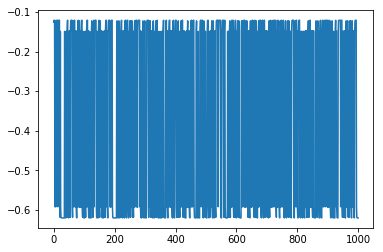

In [24]:
q_temp = [Q_val_list[i][1][0] for i in range(len(Q_val_list))]
plt.plot(q_temp)
plt.show()

In [25]:
for s in range(environment.num_states):
    state = MDPState(s)
    print('state %d' %(s, ), end=' ')
    for a in state.getLegalActions():
        print(agent.getQValue(state, a), end=' ')
    print('')

state 0 -0.9999998807907104 
state 1 -0.6206769347190857 
state 2 -1.005293846130371 


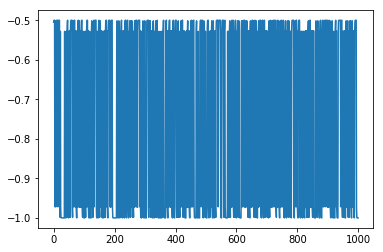

In [30]:
temp_param_list = []
for i in range(len(param_list)):
    temp_param_list.append(param_list[i][1][0])
plt.plot(temp_param_list)
plt.show()

In [ ]:
p_numpy = []
for p in agent.Q.parameters():
    p_numpy.append(deepcopy(p.to(agent.cpu_device).detach().numpy()))

In [ ]:
print(p_numpy)

In [ ]:
MDPState(0).getEncoding()